<img src="../figures/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
The Qubit
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\bn}{{\bf n}} $
$ \renewcommand{\boldn}{{\bf n}} $
$ \renewcommand{\bn}{{\bf n}} $
$ \renewcommand{\bsig}{\boldsymbol{\sigma}} $

In [11]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

<a id='top'></a>

- [The Qubit](#qubit) 

    - [Bases](#bases)
    
    - [Bloch sphere](#blochsph)
    
    
<br>

- [Operators acting on a qubit](#op_qubit) 
    
  - [Rotations](#rot)
  
  - [Simple gates](#gates)
<br>


<a id='qubit'></a>

# The Qubit

[<<<](#top)

A *bit* is a real variable $a$ that can take values in $ {\mathbb Z}_2= \{0, 1\}$.

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Definition</b>: 
<br>
a qubit is a <i>Hilbert space</i> complex of dimension two, $~\ket{v}~\in~\Hil \sim {\mathbb C}^2$ 
</p></div>

- Any *physical system* whose instantaneous state can be described by a vector $\ket{v}\in {\mathbb C}^2$ can physically host a **qubit**.
<br>

- For practical purposes, these are systems that can be in two well-defined energy levels and switch between them in a controlled manner.
<br>

- A **qutrit** is a Hilbert space of dimension $3$, a **qudit** of dimension $d$.

```

## Bases

**Computational basis**

To represent state vectors $\ket{u}\in \Hil$, we need a *basis* consisting of two orthonormal vectors.

The basis we will use is $B=\{\ket{0},\ket{1}\}$ and it is called the *computational basis*.

The computational basis is *orthonormal*

$$
\braket{0}{0} = \braket{1}{1} = 1 ~~~~~~~~~~\braket{0}{1} = \braket{1}{0} = 0
$$

The computational basis is also known as the Z basis.

 
 
- Z basis (computational basis) 
     $$
    \begin{array}{rclcl}
    \ket{0}_Z ~~\equiv ~~\ket{0} &\sim& \begin{bmatrix}  1\\ 0\end{bmatrix} \\
    \ket{1}_Z ~~\equiv~~\ket{1} &\sim&  \begin{bmatrix}  0\\ 1\end{bmatrix}
    \end{array}
    $$
    
  The name indicates that this basis is formed by the eigenstates of the operator 
  
  $$Z= \sigma_z = \begin{bmatrix} 1& 0 \\ 0 & -1 \end{bmatrix}$$ 
  
  with eigenvalues $\pm 1$.

There are infinite orthonormal bases for ${\mathbb C}^2$. Two other widely used bases are the $X$ and $Y$ bases.

- $X$ Basis 
    $$
    \begin{array}{rclcl}
    \ket{0}_X ~~\equiv ~~\ket{+} &=& \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) &=  & \frac{1}{\sqrt{2}}\begin{bmatrix}
    1\\ 1\end{bmatrix} \\
    \ket{1}_X ~~\equiv~~\ket{-} &=&  \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) &=& \frac{1}{\sqrt{2}}\begin{bmatrix}
    1\\ -1\end{bmatrix}
    \end{array}
    $$
<br>

-  This base is formed by eigenvectors of the operator $X= \sigma_x = \begin{bmatrix} 0& 1 \\ 1 & 0 \end{bmatrix}$ with eigenvalues $\pm 1$.

- $Y$ Basis
$$
    \begin{array}{rclcl}
    \ket{0}_Y ~~\equiv ~~\ket{+i} &=& \frac{1}{\sqrt{2}}(|0\rangle+i |1\rangle) &=  & \frac{1}{\sqrt{2}}\begin{bmatrix}
   1\\ i \end{bmatrix} \\
    \ket{1}_Y ~~\equiv~~\ket{-i} &=&  \frac{1}{\sqrt{2}}(|0\rangle-i |1\rangle) &=& \frac{1}{\sqrt{2}}\begin{bmatrix}
     1 \\-i \end{bmatrix}
    \end{array}
$$
<br>
This basis is formed by eigenstates of the operator $Y=\sigma_y =  \begin{bmatrix} 0& -i \\ i & 0 \end{bmatrix}$ with eigenvalues $\pm 1$.

<div class="alert alert-block alert-success">
<b>Exercise:</b> 
Write the matrices $u_{ij}$ for the change of basis $Z\to X$

$$
\ket{j}_X = \sum_j u_{ij}\ket{i}_Z
$$
    
 Do the same for $Z\to Y$ and $X\to Y$.
</div>

## Bloch Sphere

In a *classical bit* we can only store a value of 0 or 1.

How much information can a *qubit* store?


A general qubit will be of the form $\ket{u} = a\ket{0} + b\ket{1}$ where $a$ and $b$ are two complex numbers, that is, four real numbers.

However, they are subject to the constraint $|a|^2+|b|^2=1$, which leaves us with three real degrees of freedom.

But one of them is a global phase that has no significance.

Therefore, the *number of degrees of freedom (real) in a qubit is 2.*

<div class="alert alert-block alert-info">
<p style="text-align:left ;color: navy;">  
<b> Theorem </b>:
<br>    
The most <i> general</i> qubit $\ket{u}$ can be represented, in the computational basis $\{\ket{0},\ket{1}\}$, using two real numbers (angles) $\theta\in [0,\pi)$ and $\varphi\in [0,2\pi)$   
<br>
<br>
$$
|u\rangle = \cos{\frac{\theta}{2}}\, |0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}\,|1\rangle 
$$
</p>
</div>  
<details>
<summary><p style="text-align:right"> >> <i>Proof</i> </p></summary>

To demonstrate the lemma, we write a general state vector using the polar representation for the complex components
    
$$
\begin{array}{rcl}
\ket{u} &=& u_0\ket{0} + u_1\ket{1} \\
&=& a_0 e^{i b_0}\ket{0} + a_1 e^{ib_1}\ket{1}\\
&=& e^{i b_0}\big(a_0 \ket{0} + a_1 e^{i(b_1-b_0)}\ket{1}\big)\\
&\sim & \big( a_0 \ket{0} + a_1 e^{i(b_1-b_0)}\ket{1} \big)
\end{array}
$$
    
where we have used the irrelevance of a global phase to discard $e^{i b_0}$ in the last line.

Now $a_1$ and $a_0$ are not independent numbers but satisfy $a_0^2 + a_1^2 = 0$ so that $\|\ket{u}\|=1$.
This equation can be solved in terms of an angle $\theta/2$ such that
$$
a_0 = \cos\frac{\theta}{2}~~~,~~~ a_1 = \sin\frac{\theta}{2} 
$$
On the other hand, of the numbers $b_1, b_2$ only the difference
$$
\varphi = b_1-b_2
$$
is relevant to specify $\ket{u}$.   
</details>

The range of $\theta\in [0,\pi)$ and $\varphi\in [0,2\pi)$ allows these real numbers to be interpreted as *angles on the unit sphere*.

We can represent each state of a qubit as a *point* on a sphere of unit radius: the *Bloch sphere*.


-  $\theta\in [0,\pi)$ the *azimuthal* angle is measured from the $Z$ axis. So $\theta=\pi/2$ is the *equator 
of the Bloch sphere*.
<br>

-  $\phi\in [0,2\pi)$ the *polar* angle around the $Z$ axis, measured from the $XZ$ plane
<br>

<div>
<img src="images/BlochSphere.png" width="25%" style="margin:auto"/>
</div>
<br>


##  Basis at an angle
<br>

A pair of angles $(\theta, \phi)$ with $\theta \in [0,\pi)$ and $\phi\in [0,2\pi)$ specifies 

- a unit vector in *physical space* $~\hat\boldn \in \mathbb{R}^3$

$$
\hat\bn(\theta,\phi) = \sin\theta\cos\phi \, \hat {\bf x} + \sin\theta\sin\phi \, \hat {\bf y} + \cos\theta \, \hat {\bf z}
$$




- a pair of conjugate points on the Bloch sphere

$$
\ket{+,\hat{\bf n}}  = \cos{\frac{\theta}{2}}\, |0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}\,|1\rangle ~~~~,~~~~
\ket{-,\hat{\bf n}}  = -e^{-i\phi}\sin\displaystyle\frac{\theta}{2} \, |0\rangle + \cos\displaystyle\frac{\theta}{2}\,|1\rangle
$$

where $\braket{+,\hat{\bf n}}{-,\hat{\bf n}} =0$ easily follows.  The relation between $\hat\bn$ and $\ket{\pm,\hat{\bf n}}$ comes in from the following algebraic result


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Lemma</b>:
<br>
The orthonormal states $\ket{\pm,\hat{\bf n}}$ are eigenstates of  $(\hat{\boldn}\cdot \boldsymbol{\sigma})$  with eigenvalues $\pm 1$
<br>
<br>    
$$
(\hat{\boldn}\cdot \boldsymbol{\sigma})\,\ket{\pm,\hat{\bf n}} = \pm \, \ket{\pm,\hat{\bf n}}
$$
<br>    
</div>



<div class="alert alert-block alert-success",text-align:center>
<p style="text-align: left ;">  
<b>Exercise</b>: 
verify that the states $\ket{\pm,\hat\bn}$ are orthogonal and are eigenstates of the operator $~ \hat{\bf n} \cdot \boldsymbol{\sigma} ~$ with eigenvalues $~\pm 1$
</p>    
</div>

<div class="alert alert-block alert-danger",text-align:center>
<p style="text-align: left ;">  
Alternative notation,  adapted to Quantum Computing 
<br>
<br>
$$
 \ket{+,\hat{\bf n}}  =  \ket{0}_{\hat{\bf n}} ~~~~~~,~~~~~~ \ket{-,\hat{\bf n}}  =  \ket{1}_{\hat{\bf n}} 
$$
</div>






<figure><center> 
<img src="images/BlochSphere_basis.png" align=center width='30%'/>
</center></figure>

Hence, oposite points on the Bloch sphere correspond to orthogonal quantum states. 




The particular cases from the previous section are recovered by making

$$
\begin{array}{ccl}
\hat{\bf n} \to \hat{\bf z} ~~~\Rightarrow ~~~Z = \hat{\bf z} \cdot \boldsymbol{\sigma} ~~&\rightarrow& ~~\{\ket{0},\ket{1} \} = \{\ket{0}_{\hat{\bf z}},\ket{1}_{\hat{\bf z}}\}\\ \rule{0mm}{15mm}
\hat{\bf n} \to \hat{\bf y} ~~~\Rightarrow ~~~X = \hat{\bf x} \cdot \boldsymbol{\sigma} ~~&\rightarrow&  \{\ket{+},\ket{-}\}  = \{\ket{0}_{\hat{\bf x}},\ket{1}_{\hat{\bf x}}\} \\ \rule{0mm}{15mm}
\hat{\bf n} \to \hat{\bf z} ~~~\Rightarrow ~~~Y = \hat{\bf y} \cdot \boldsymbol{\sigma} ~~&\rightarrow&  \{\ket{+i},\ket{-i}\}  = \{\ket{0}_{\hat{\bf y}},\ket{1}_{\hat{\bf y}}\}
\end{array}
$$



##  Visualizations





- [Java visualizer](https://javafxpert.github.io/grok-bloch/?fbclid=IwAR1lWfCug1lfTXxXenaJxnsdJh2g3he6lBJmjnjL_Jus0gOHR9u3UuaT7qs)


- The <a href=https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html>statevector</a> class in *qiskit* has a Bloch sphere *visualizer*. The class accepts a list of two complex numbers as components of a vector. 
<br>

It is necessary to ensure that the vector is normalized, because it does not warn otherwise.


In [6]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex , plot_bloch_multivector  

# Ejemplo de vector de estado |+> 
e_mas =1/np.sqrt(2)*np.array([1,-1])

Statevector(e_mas).draw('latex')

<IPython.core.display.Latex object>

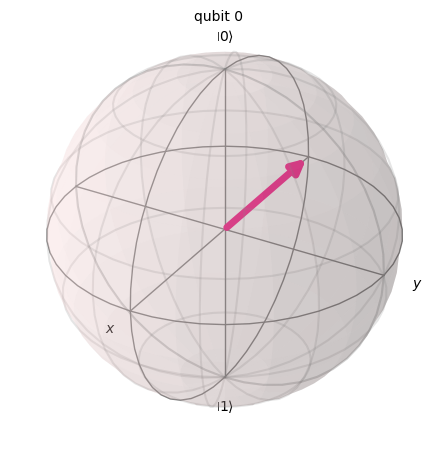

In [7]:
Statevector(e_mas).draw('Bloch')

Given two angles $\theta\in(0,\pi)$ and $\phi\in(0,2\pi)$ 

In [ ]:
theta = 1.9
phi   = 0.8

uket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)

Statevector(uket).draw('latex')

In [ ]:
Statevector(uket).draw('Bloch')


**Z Basis**
  
-   $(\theta,\phi) = (0,0) \Rightarrow  \ket{0}_Z = \ket{0}$ 




  
-   $(\theta,\phi) = (\pi,\phi)  \Rightarrow  e^{i\phi}\ket{1}_Z = \ket{1}$
  
  
 
<div>
<img src="images/Basis_Z.png"  width="30%" style="margin:auto"/>
</div>


**X Basis**
 
-   $(\theta,\phi) = (\pi/2,0)  ~\Rightarrow~  \frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle \big) =\ket{0}_X \equiv |+\rangle$
<br>
-   $(\theta,\phi) = (\pi/2,\pi) ~\Rightarrow~  \frac{1}{\sqrt{2}}\big(|0\rangle-|1\rangle \big)=\ket{1}_X \equiv |-\rangle$
<br>
<br>

<div>
<img src="images/Basis_X.png"  width="30%" style="margin:auto"/>
</div>


**Y Basis**

-   $(\theta,\phi) = (\pi/2,\pi/2) ~\Rightarrow ~|u\rangle =\frac{1}{\sqrt{2}}\big(|0\rangle+i|1\rangle\big) =\ket{0}_Y \equiv  |+i\rangle$
<br>
-   $(\theta,\phi) = (\pi/2,3\pi/2) ~\Rightarrow ~|u\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle-i|1\rangle\big) = \ket{1}_Y \equiv  |-i\rangle$
<br>
<br>

<div>
<img src="images/Basis_Y.png"  width="30%" style="margin:auto"/>
</div>



## Quantum Register

A **quantum register** contains the *temporal evolution* of a qubit.  


<br>
<div>
<img   src="images/q_register.png"   width="30%" style="margin:auto"/>
</div>
<br>

Along quantum register  a linear superposition $\ket{\psi} = a\ket{0} + b\ket{1}$ can flow.
A classical register can only be $0~$ or $~1$

<IPython.core.display.Latex object>

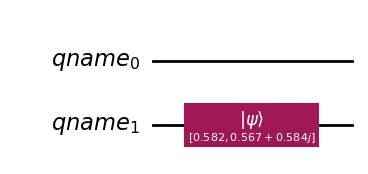

In [4]:
'en qiskit podemos inicializar un registro cuántico en un estado |q> arbitrario usando el método initialize()'
from qiskit import QuantumCircuit, QuantumRegister

qr = QuantumRegister(2,name='qname')

qc = QuantumCircuit(qr)

theta = 1.9
phi   = 0.8

ket = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]
display(array_to_latex(ket))

qc.initialize(ket,qr[1])
qc.draw(output='mpl')

<a id='op_qubit'></a>

# Operators acting on a qubit

[<<<](#top)

Any unitary operator preserves the norm and, therefore, maps a vector to another on the same Bloch sphere.

This operation can be visualized as a **rotation** by a certain angle $\alpha$, around some axis $\hat{\bf n}$

$$ \ket{u} = R_{\hat\bn}(\alpha)\ket{v}$$

<div>
<img src="images/BlochSphere2.png"  width="30%" style="margin:auto"/>
</div>


<a id='rot'></a>

## Rotations on the Bloch Sphere

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Theorem</b>:
<br>
    The operator that performs a <i>rotation by angle</i>  $\alpha\in [0,2\pi)$ around the <i>axis defined by a unit vector</i>  $\hat{\bf n} = (n_x, n_y,n_z)$ is 
<br> 
<br>    
\begin{eqnarray}
R_{\hat{\bf n}}(\alpha)~ = ~\exp\left( -i\frac{\alpha}{2} \hat{\bf n}\cdot \boldsymbol{\sigma} \right) ~=~ 
\cos \frac{\alpha}{2} I - i \sin\frac{\alpha}{2} \hat{\bf n}\cdot\boldsymbol{\sigma} 
\end{eqnarray}
</p>    
</div> 
<br>

where $\boldsymbol{\sigma} = (\sigma_x, \sigma_y, \sigma_z)$ are the Pauli matrices
$$
\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}~~,~~
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}~~,~~
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}~~.~~
$$

By making the sum explicitly, we can write the unitary matrix 
<br>
<br>

\begin{eqnarray}
R_{\hat{\bf n}}(\alpha)~  ~=~ 
 \begin{bmatrix} \cos \displaystyle\frac{\alpha}{2} - i n_z\sin\frac{\alpha}{2} &\displaystyle (-in_x- n_y)\sin\frac{\alpha}{2} \\ \displaystyle
(-in_x + n_y) \sin\frac{\alpha}{2} & \displaystyle \cos \frac{\alpha}{2} + i n_z\sin\frac{\alpha}{2} \end{bmatrix}
\end{eqnarray}


<div class="alert alert-block alert-danger",text-align:center>
<b> Note</b>:
    the direction of rotation produced by $R_{\hat{\bf n}}(\alpha)$ around the axis $\hat{\bf n}$ is given by the <i>right-hand rule</i> or, also, <i>counterclockwise</i>. 
</div>

### Rotations X, Y, and Z

- Associated with rotations around the $X$, $Y$, and $Z$ axes by an angle $\alpha$, we find the following three gates


<br>

$$
\begin{array}{rcl}
\hat{\bf z} = (0,0,1) ~~\Rightarrow ~~ R_{\hat {\bf z}}(\alpha) &=&  \begin{bmatrix} e^{-i\alpha/2}  & 0 \\ 0 & e^{i\alpha/2}  \end{bmatrix}  ~,~\nonumber\\
\rule{0mm}{14mm}
\hat{\bf y} = (0,1,0) ~~\Rightarrow ~~ R_{\hat {\bf y}}(\alpha) &=&  \begin{bmatrix} \cos \alpha/2  & -\sin \alpha/2 \\   \sin\alpha/2 & \cos\alpha/2 \end{bmatrix}  \nonumber \\
\rule{0mm}{14mm}
\hat{\bf x} = (1,0,0) ~~\Rightarrow ~~ R_{\hat {\bf x}}(\alpha)  &=&  \begin{bmatrix} \cos\alpha/2  &- i\sin\alpha/2 \\   -i\sin\alpha/2& \cos\alpha/2 \end{bmatrix} \, .\nonumber
\end{array}
$$

<br>

### Euler Parametrisation

We need *3 parameters* to specify a general rotation.
In $R_{\hat{\bf n}}(\theta)$ one parameter is $\theta$ and two others are included in $\hat{\bf n}$ with 
$  |\hat{\bf n}|=1$.

The *Euler parametrisation* consists of a *composition of three successive rotations* around the axes $z$, then $y$, and finally $z$ again:

Multiplying the associated matrices, and extracting a global phase, we define

$$
R_{\hat {\bf z}}(\phi)R_{\hat {\bf y}}(\theta)R_{\hat {\bf z}}(\varphi) = e^{-\frac{i}{2}(\phi + \varphi)}U(\theta,\phi,\varphi)  
$$


The *Euler angles* are $\theta,\phi $ and $\varphi$, and making the explicit multiplications the  result for $U$ is

$$
U(\theta,\phi,\varphi)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & - e^{i\varphi} \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i(\varphi+\phi)} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$

<br>

It is evident that the action of this operator on the $Z$ basis $\{\ket{0},\ket{1}\}$ 
<br>

$$
U(\theta,\phi,\varphi)\begin{bmatrix} 1\\0\end{bmatrix} = \begin{bmatrix} \cos\displaystyle\frac{\theta}{2}\\ e^{i\phi} \sin \displaystyle \frac{\theta}{2} \end{bmatrix} ~~~~~~,~~~~~~~
U(\theta,\phi,\varphi)\begin{bmatrix} 0\\1\end{bmatrix} = \begin{bmatrix} -e^{i\varphi}\sin\displaystyle\frac{\theta}{2}\\ e^{i(\varphi + \phi)} \cos \displaystyle \frac{\theta}{2} \end{bmatrix} 
$$
<br>


 maps the $Z$ eigenbasis to the eigenbasis of $\, \hat {\bf n} \cdot \bsig$

$$
\ket{0}_{\hat\boldn} = U \ket{0}_{\hat{\bf z}}~~~~~~,~~~~~~
\ket{1}_{\hat\boldn} = U \ket{1}_{\hat{\bf z}}
$$
<br>


<figure><center> 
<img src="images/BlochSphere_basis.png" align=center width='30%'/>
</center></figure>

<a if='Simple gates'></a>
## Simple Gates

By simple gates, we mean a set of *unitary operators* that are frequently used in quantum computing. Let's look at the simple gates on 1 qubit

### Phase Gate

- $P_\alpha = P(\alpha)$ with $\alpha \in [0,2\pi)$
<br>
<br>
$$
P(\alpha)= \begin{bmatrix}
1 & 0 \\ 0 & e^{i\alpha} 
\end{bmatrix}  =  \ketbra{0}{0} + e^{i\alpha}\ketbra{1}{1}
$$
<br>
is unitary for all $\alpha$ as can be easily verified. Applied to a generic qubit state 
<br>
<br>
$$
P(\alpha) \ket{u} =  \begin{bmatrix} 1 & 0 \\ 0 & e^{i\alpha} \end{bmatrix}
\begin{bmatrix} \cos\theta \\ \sin\theta e^{i\phi} \end{bmatrix} = \begin{bmatrix} \cos\theta \\ \sin\theta e^{i(\phi+\alpha)} 
\end{bmatrix}= \ket{v}
$$
<br>

The effect of this operator is to rotate any qubit around the Z axis by an angle $\alpha$. We verify that it is related to $R_z(\alpha)$
<br>
<br>
$$
P(\alpha) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\alpha} \end{bmatrix} = 
\begin{bmatrix} e^{i\alpha/2} & 0 \\ 0 & e^{i\alpha/2} \end{bmatrix} 
\begin{bmatrix} e^{-i\alpha/2} & 0 \\ 0 & e^{i\alpha/2} \end{bmatrix}   \equiv e^{i\alpha/2} R_z(\alpha)
$$
<br>
<br>
The global phase is trivial. Therefore, the two operators $P(\alpha)$ and $R_Z(\alpha)$ are equivalent and produce the same effect on the Bloch sphere.

- $K_\alpha = K(\alpha)$
<br>
<br>
it is really a trivial phase, but sometimes it is used
$$
K(\alpha)= e^{i\alpha} \begin{bmatrix}
1 & 0 \\ 0 & 1 
\end{bmatrix} =  e^{i\alpha}\left(\rule{0mm}{4mm} \ketbra{0}{0} + \ketbra{1}{1} \right) = e^{i\alpha} I 
$$

### Discrete Gates

There are a series of discrete rotations that form a set of elementary gates of great utility
<br>

- $X,Y,Z$

$$
\begin{eqnarray}
i R_{\hat{\bf x}}(\pi) &=&   \begin{bmatrix}0&1\\1&0\end{bmatrix}   ~= ~ X  \\
\\
i R_{\hat{\bf y}}(\pi) &=&  \begin{bmatrix}0&-i\\i&0\end{bmatrix}    ~= ~ Y \\
\\
i R_{\hat{\bf z}}(\pi) &=&   \begin{bmatrix}1&0\\0&-1\end{bmatrix} ~= ~ Z 
\end{eqnarray}
$$
<br>


-  $S,T$

Any power of a unitary operator $U$ is another unitary operator $U^\alpha$ 

Thus we obtain
<br>
<br>

\begin{eqnarray}
S = Z^{1/2} &=&  \begin{bmatrix}1&0\\0&i\end{bmatrix}=\begin{bmatrix}1&0\\0&e^{i\pi/2}\end{bmatrix}  \\
&& \\
T  = Z^{1/4} &=&  \begin{bmatrix}1&0\\0&e^{i\pi/4}\end{bmatrix} 
\end{eqnarray}
<br>


- $H$   

The Hadamard gate, $H$, is the first *genuinely quantum* gate in the sense that it takes a basis state to a coherent superposition
<br>

\begin{eqnarray}
H \ket{0} &=& \frac{1}{\sqrt{2}}\left(\rule{0mm}{4mm}\ket{0} + \ket{1}\right) =\ket{+}   \\
H \ket{1} &=& \frac{1}{\sqrt{2}}\left(\rule{0mm}{4mm}\ket{0} - \ket{1}\right) =\ket{-} 
\end{eqnarray}


We can write this operator in the canonical basis 

\begin{eqnarray}
H &=&  \ket{+}\bra{0} +  \ket{-}\bra{1} \\
&=& \frac{1}{\sqrt{2}}(\ketbra{0}{0} + \ketbra{1}{0} + \ketbra{0}{1} - \ketbra{1}{1})
\end{eqnarray}




The matrix representation of $H$ is easily deduced

$$
H  =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1& 1 \\ 1 & -1 \end{bmatrix}  
$$
<br>


The action of $H$ is a rotation on the Bloch sphere of $\pi$ radians around a diagonal axis located at 45$^\circ$ between the $x$ axis and the $y$ axis. 
<br>

This rotation swaps the $x$ and $z$ axes and reverses the direction of the $y$ axis.

$$
\begin{array}{rcl}
\hat{\bf n} = \frac{1}{\sqrt{2}}(1,0,1) ~~~~~ \Rightarrow ~~~~~ iR_{\hat{\bf n}}(\pi) &=&\frac{1}{\sqrt{2}} \begin{bmatrix} 1  & 1 \\ 1 & -1  \end{bmatrix} ~ = ~H\nonumber\\
\end{array}
$$


<div class="alert alert-block alert-success">
<b>Exercise:</b>: check this result 
</div>

<div class="alert alert-block alert-danger">

<b> Note</b>:
   
- Like any rotation of $\alpha = \pi/2$, a second application results in the identity

$$
H^2 = I
$$
<br>
    
- In subsequent calculations, we will find the following representation of the action of $H$ very useful

$$
H \ket{x} =\frac{1}{\sqrt{2}} \sum_{y=0,1} (-1)^{ x  y} \ket{y}
$$
<br>
    
</div>

### Decomposition

Quantum computing is based on the decomposition of a gate into a product of other simpler ones.

In the case of $H$, a bit of spatial insight shows that its action is equivalent to the composition of

- a rotation of $\pi/2$ radians about the $Y$ axis

- followed by a rotation of $\pi$ radians around the $X$ axis.

We demonstrate it algebraically (disregarding global phases)

$$
 R_x(\pi)R_{y}\left(\frac{\pi}{2}\right) = \begin{bmatrix}0&-i\\-i&0\end{bmatrix} \begin{bmatrix}\cos\pi/4& -\sin\pi/4 \\ \sin\pi/4 & \cos\pi/4 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}0&1\\1&0\end{bmatrix} \begin{bmatrix}1 & -1 \\ 1 & 1 \end{bmatrix}  = \frac{-i}{\sqrt{2}} \begin{bmatrix}1&1\\1&-1\end{bmatrix} =-i H \sim H
$$


<div class="alert alert-block alert-success">
<b>Exercise:</b> 
Find the values of the angles $\theta,\phi,\varphi$ that satisfy the following identities
    
    
 $$
 U(\theta,\phi,\varphi) = H ~~~~,~~~~  U(\theta,\phi,\varphi) = SH
 $$
</div>

## Quantum Circuit

The application of a *gate* 
<br>
$$
\ket{\psi} \to  U(\theta,\phi,\varphi)\ket{\psi}
$$
<br>

is represented by a square containing the data of the associated operator
<br>
<br>

<div>
<img src="images/puerta_simple.png" width="20%" style="margin:auto"/>
</div>

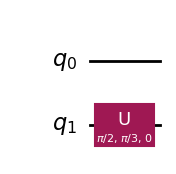

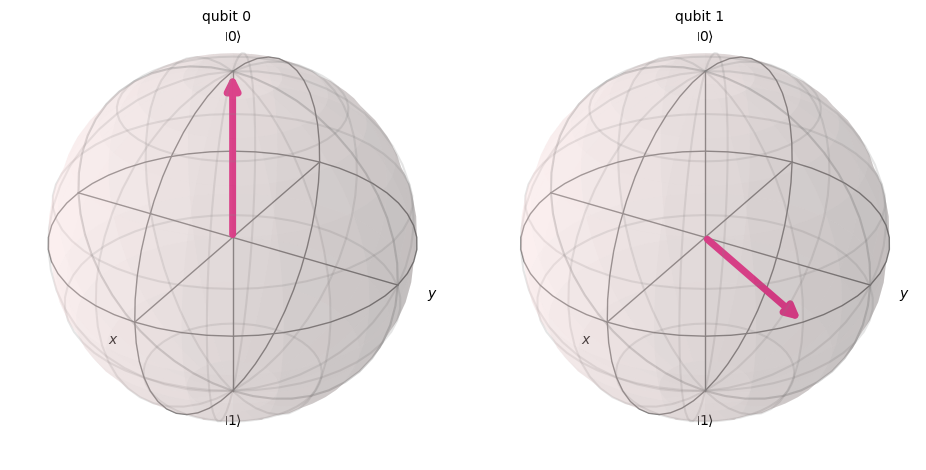

In [18]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.u(np.pi/2, np.pi/3,0,1) 
#qc.h(0)

display(qc.draw(output='mpl'))


Statevector(qc).draw('Bloch')

The concatenation of gates corresponds to the <i>composition of operators</i>, that is, with the <i>multiplication of the associated matrices</i>.

<div class="alert alert-block alert-danger",text-align:center>
<b> Note</b>: 
    
The order in which they appear in the quantum circuit is the <b>inverse</b> of that in the algebraic composition of operators
</div>

For example, a circuit that simulates the action $SH\ket{\psi}$ must first apply $H$ and then $S$

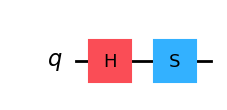

<IPython.core.display.Latex object>

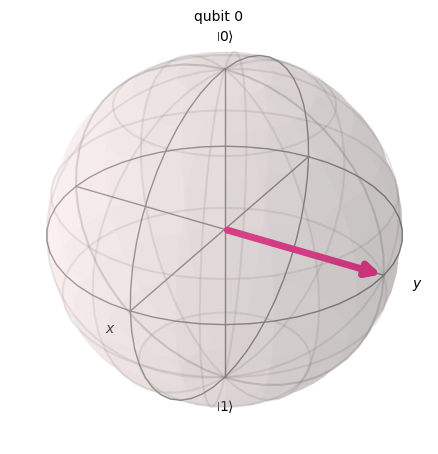

In [21]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)

#qc.x(0)
#qc.y(0)
qc.h(0)
#qc.z(0)
qc.s(0)
#qc.t(0)

# qc.u(theta,phi,lambda,quantum register)  https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html
#qc.u(np.pi/4,np.pi/2,0,0)
display(qc.draw(output='mpl'))

display(Statevector(qc).draw('Latex'))
display(Statevector(qc).draw('Bloch'))